In [4]:
#data manipulation
from pathlib import Path
import numpy as np
from numpy import percentile
from datetime import datetime, timedelta
import xarray as xr
import pandas as pd
import glob
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.constants import g, pi

from math import sqrt, radians
import scipy.stats


#mapping
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatch
import matplotlib.patches as patches
from matplotlib.transforms import offset_copy
import matplotlib.colors as colors
import seaborn as seabornInstance 
import seaborn as sns

from itertools import count

%matplotlib inline

In [12]:
b44017_wind_wave = pd.read_csv('b44017_wind_wave.txt')
b44017_wind_wave

,Date,WDIR,WSPD,WVHT,DPD,MWD
0,2008-04-30 20:50:00,291,4.6,1.09,9.09,143
1,2008-04-30 21:50:00,258,2.2,1.07,10.00,108
2,2008-04-30 22:50:00,228,6.3,0.96,8.33,149
3,2008-04-30 23:50:00,238,7.1,0.89,9.09,116
4,2008-05-01 00:50:00,236,6.6,1.01,8.33,169
...,...,...,...,...,...,...
42994,2020-12-31 19:40:00,311,7.0,2.05,7.69,188
42995,2020-12-31 20:40:00,339,7.0,1.62,8.33,181
42996,2020-12-31 21:40:00,334,6.5,1.66,7.69,195
42997,2020-12-31 22:40:00,343,8.4,1.66,8.33,191


In [10]:
b44020_wind_wave = pd.read_csv('b44020_wind_wave.txt')
b44020_wind_wave

,Date,WDIR,WSPD,WVHT,DPD,MWD
0,2009-03-10 15:50:00,29,2.5,0.61,6.25,93
1,2009-03-10 16:50:00,34,2.6,0.68,4.00,85
2,2009-03-10 18:50:00,82,3.9,0.52,5.56,85
3,2009-03-10 19:50:00,85,4.5,0.44,4.00,260
4,2009-03-10 22:50:00,101,5.2,0.37,5.00,88
...,...,...,...,...,...,...
70493,2020-12-31 15:40:00,263,8.0,0.65,3.33,257
70494,2020-12-31 16:40:00,254,5.2,0.56,3.45,253
70495,2020-12-31 17:40:00,253,3.8,0.42,3.45,252
70496,2020-12-31 18:40:00,266,4.0,0.31,3.57,243


In [7]:
b44017_wind_wave['inv_wave_age'].min(), b44017_wind_wave['inv_wave_age'].max()

(-1.8021378146759197, 2.713485008737297)

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_19124/3381580193.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


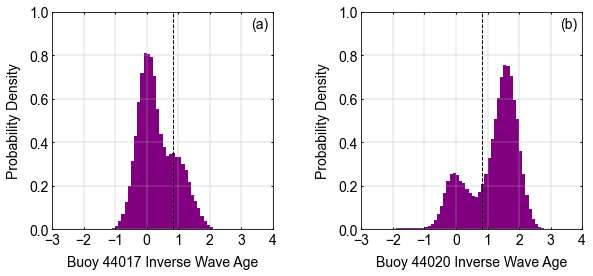

In [64]:
fig, ax_lst = plt.subplots(1, 2,figsize=(9.5, 4.), gridspec_kw={'hspace': 0.25, 'wspace': 0.4})
fig.tight_layout()

def label_subplots(ax_lst, *, upper_case=False,
                   offset_points=(-5, -5)):
    start_ord = 65 if upper_case else 97
    for ax, lab in zip(np.ravel(ax_lst), ('('+chr(j)+')' for j in count(start_ord))):
        ax.annotate(lab, (1., 1),
                    xytext=offset_points,
                    xycoords='axes fraction',
                    textcoords='offset points',
                    ha='right', va='top', fontsize=14, fontweight='regular')


label_subplots(ax_lst, upper_case=False)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

bins=range(0, 30, 1)


# Figure 1
bins=np.arange(-2.8, 4., 0.1)
ax_lst[0].axvline(0.83, color='black', linestyle='--',label='', linewidth=1.)
ax_lst[0].hist(b44017_wind_wave['inv_wave_age'], bins=bins, density=True, color='purple', alpha=1, label='')

ax_lst[0].set_xlabel('Buoy 44017 Inverse Wave Age',labelpad=8)
ax_lst[0].set_ylabel('Probability Density',labelpad=8)


ax_lst[0].set_ylim(0, 1.)
ax_lst[0].set_xlim(-3, 4)
ax_lst[0].set_xticks(np.arange(-3, 4.5,1))

ax_lst[0].grid(linestyle='-',linewidth=0.4)


ax_lst[0].xaxis.set_tick_params(which='major', size=2, width=1, direction='in', top='on')
ax_lst[0].yaxis.set_tick_params(which='major', size=2, width=1, direction='in', right='on')


# Figure 2
bins=np.arange(-2.8, 4., 0.1)
ax_lst[1].axvline(0.83, color='black', linestyle='--',label='', linewidth=1.)
ax_lst[1].hist(b44020_wind_wave['inv_wave_age'], bins=bins, density=True, color='purple', alpha=1, label='')


ax_lst[1].set_xlabel('Buoy 44020 Inverse Wave Age',labelpad=8)
ax_lst[1].set_ylabel('Probability Density',labelpad=8)


ax_lst[1].set_ylim(0, 1.)
ax_lst[1].set_xlim(-3, 4)
ax_lst[1].set_xticks(np.arange(-3, 4.5,1))

ax_lst[1].grid(linestyle='-',linewidth=0.4)


ax_lst[1].xaxis.set_tick_params(which='major', size=2, width=1, direction='in', top='on')
ax_lst[1].yaxis.set_tick_params(which='major', size=2, width=1, direction='in', right='on')

plt.savefig('enve5320_inverse_wave_age.pdf', dpi=600, bbox_inches='tight')

In [26]:
wave_44017 = b44017_wind_wave[(b44017_wind_wave['inv_wave_age'] < 0.15) & (b44017_wind_wave['inv_wave_age'] > 0.)
                                     & (b44017_wind_wave['u10'] < 2.)]
swell_44017 = b44017_wind_wave[(b44017_wind_wave['inv_wave_age'] < 0.15)]
wind_44017 = b44017_wind_wave[(b44017_wind_wave['inv_wave_age'] > 0.833)]
mixed_44017 = b44017_wind_wave[(b44017_wind_wave['inv_wave_age'] < 0.833)
                                            & (b44017_wind_wave['inv_wave_age'] > 0.15)]


wave_freq_44017 = len(wave_44017)/len(b44017_wind_wave['inv_wave_age'])

swell_freq_44017 = len(swell_44017)/len(b44017_wind_wave['inv_wave_age'])

wind_freq_44017 = len(wind_44017)/len(b44017_wind_wave['inv_wave_age'])

mixed_freq_44017 = len(mixed_44017)/len(b44017_wind_wave['inv_wave_age'])

In [27]:
wind_44017

,WDIR,WSPD,WVHT,DPD,MWD,u10,theta,theta_rad,cp,inv_wave_age,spectral_steepness
Date,,,,,,,,,,,
2008-05-02 08:50:00,141,7.2,0.56,3.23,179,7.805117,-38,-0.663225,5.041309,1.220024,0.034391
2008-05-02 09:50:00,130,7.3,0.64,3.23,167,7.913521,-37,-0.645772,5.041309,1.253646,0.039304
2008-05-02 10:50:00,112,6.5,0.70,3.45,155,7.046286,-43,-0.750492,5.384680,0.957035,0.037681
2008-05-03 00:50:00,83,10.1,1.91,5.56,110,10.948844,-27,-0.471239,8.677919,1.124174,0.039586
2008-05-03 01:50:00,81,8.5,1.85,5.56,95,9.214374,-14,-0.244346,8.677919,1.030278,0.038343
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 08:40:00,213,12.9,3.09,7.69,219,13.984168,-6,-0.104720,12.002374,1.158734,0.033478
2020-12-31 09:40:00,217,11.6,3.03,8.33,208,12.574910,9,0.157080,13.001271,0.955298,0.027978
2020-12-31 10:40:00,228,12.4,2.99,7.69,208,13.442146,20,0.349066,12.002374,1.052416,0.032395


In [58]:
swell_mixed_44020 = b44020_wind_wave[(b44020_wind_wave['inv_wave_age'] < 0.833)]
wind_44020 = b44020_wind_wave[(b44020_wind_wave['inv_wave_age'] > 0.833)]

swell_mixed_freq_44020 = len(swell_mixed_44020)/len(b44020_wind_wave['inv_wave_age'])

wind_freq_44020 = len(wind_44020)/len(b44020_wind_wave['inv_wave_age'])

In [40]:
wave_44025 = b44025_wind_wave[(b44025_wind_wave['inv_wave_age'] < 0.15) & (b44025_wind_wave['inv_wave_age'] > 0.)
                                     & (b44025_wind_wave['u10'] < 2.)]
swell_44025 = b44025_wind_wave[(b44025_wind_wave['inv_wave_age'] < 0.15)]
wind_44025 = b44025_wind_wave[(b44025_wind_wave['inv_wave_age'] > 0.833)]
mixed_44025 = b44025_wind_wave[(b44025_wind_wave['inv_wave_age'] < 0.833)
                                            & (b44025_wind_wave['inv_wave_age'] > 0.15)]


wave_freq_44025 = len(wave_44025)/len(b44025_wind_wave['inv_wave_age'])

swell_freq_44025 = len(swell_44025)/len(b44025_wind_wave['inv_wave_age'])

wind_freq_44025 = len(wind_44025)/len(b44025_wind_wave['inv_wave_age'])

mixed_freq_44025 = len(mixed_44025)/len(b44025_wind_wave['inv_wave_age'])

In [90]:
model10 = LinearRegression(fit_intercept=False)
x10 = wind_44017['u10']
y10 = wind_44017['WVHT']
#model.fit(x[:, np.newaxis], y)
xfit10 = np.linspace(pd.Series.min(x10), 25, 1000)

poly_model10 = make_pipeline(PolynomialFeatures(2), model10)

poly_model10.fit(x10[:, np.newaxis], y10)
yfit10 = poly_model10.predict(xfit10[:, np.newaxis])

N10 = len(x10)
a10 , b10, c10 = poly_model10.steps[1][1].coef_

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_19124/2026503774.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model10.fit(x10[:, np.newaxis], y10)


In [91]:
# evaluate with R squared

y10_model = c10*(x10**2) + b10*x10 + a10

residuals = y10 - y10_model
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y10-np.mean(y10))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.7276911009763845

In [92]:
model11 = LinearRegression(fit_intercept=False)
x11 = b44017_wind_wave['u10']
y11 = b44017_wind_wave['WVHT']
#model.fit(x[:, np.newaxis], y)
xfit11 = np.linspace(pd.Series.min(x11), 25, 1000)

poly_model11 = make_pipeline(PolynomialFeatures(2), model11)

poly_model11.fit(x11[:, np.newaxis], y11)
yfit11 = poly_model11.predict(xfit11[:, np.newaxis])

N11 = len(x11)
a11 , b11, c11 = poly_model11.steps[1][1].coef_

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_19124/3738019392.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model11.fit(x11[:, np.newaxis], y11)


In [93]:
# evaluate with R squared

y11_model = c11*(x11**2) + b11*x11 + a11

residuals = y11 - y11_model
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y11-np.mean(y11))**2)
r_squared1 = 1 - (ss_res / ss_tot)
r_squared1

0.519765876945625

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_19124/1757138528.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


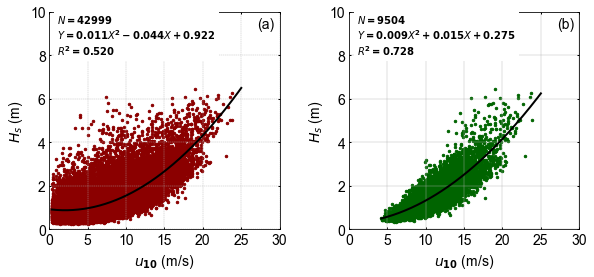

In [102]:
fig, ax_lst = plt.subplots(1, 2,figsize=(9.5, 4.), gridspec_kw={'hspace': 0.25, 'wspace': 0.3})
fig.tight_layout()

def label_subplots(ax_lst, *, upper_case=False,
                   offset_points=(-5, -5)):
    start_ord = 65 if upper_case else 97
    for ax, lab in zip(np.ravel(ax_lst), ('('+chr(j)+')' for j in count(start_ord))):
        ax.annotate(lab, (1., 1),
                    xytext=offset_points,
                    xycoords='axes fraction',
                    textcoords='offset points',
                    ha='right', va='top', fontsize=14, fontweight='regular')


label_subplots(ax_lst, upper_case=False)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

bins=range(0, 30, 1)


# Figure 1
ax_lst[0].scatter(x11, y11, s=6,color='darkred')

ax_lst[0].plot(xfit11, yfit11, color='black', linewidth=2)

ax_lst[0].set_xlabel('$u_{10}$ (m/s)', labelpad=5)
ax_lst[0].set_ylabel('$H_{s}$ (m)', labelpad=5)


ax_lst[0].set_ylim(0,10)
ax_lst[0].set_xlim(0,30)
ax_lst[0].set_xticks(np.arange(0,35,5))
ax_lst[0].grid(linestyle='--',linewidth=0.4)

props11 = dict(boxstyle='square', facecolor='white', alpha=1,edgecolor='white')

textstr11 = '\n'.join((r'$N=%i$' % (N11,), (r'$Y=%.3fX^{2} %.3fX + %.3f$' % (c11,b11,a11,)), (r'$R^2=%.3f$' % (r_squared1,))))

ax_lst[0].text(1.,8.,textstr11,fontsize=10,bbox=props11)


ax_lst[0].xaxis.set_tick_params(which='major', size=2, width=1, direction='in', top='on')
ax_lst[0].yaxis.set_tick_params(which='major', size=2, width=1, direction='in', right='on')


# Figure 2
ax_lst[1].scatter(x10, y10, s=6,color='darkgreen')

ax_lst[1].plot(xfit10, yfit10, color='black', linewidth=2)

ax_lst[1].set_xlabel('$u_{10}$ (m/s)', labelpad=5)
ax_lst[1].set_ylabel('$H_{s}$ (m)', labelpad=5)


ax_lst[1].set_ylim(0,10)
ax_lst[1].set_xlim(0,30)
ax_lst[1].set_xticks(np.arange(0,35,5))
ax_lst[1].grid(linestyle='-',linewidth=0.4)

props10 = dict(boxstyle='square', facecolor='white', alpha=1,edgecolor='white')

textstr10 = '\n'.join((r'$N=%i$' % (N10,), (r'$Y=%.3fX^{2} + %.3fX + %.3f$' % (c10,b10,a10,)), (r'$R^2=%.3f$' % (r_squared,))))

ax_lst[1].text(1.,8.,textstr10,fontsize=10,bbox=props10)


ax_lst[1].xaxis.set_tick_params(which='major', size=2, width=1, direction='in', top='on')
ax_lst[1].yaxis.set_tick_params(which='major', size=2, width=1, direction='in', right='on')

plt.savefig('enve5320_buoy44017_wind_wave.png', dpi=600, bbox_inches='tight')

### Buoy 44020

In [111]:
model10 = LinearRegression(fit_intercept=False)
x10 = wind_44020['u10']
y10 = wind_44020['WVHT']
#model.fit(x[:, np.newaxis], y)
xfit10 = np.linspace(pd.Series.min(x10), 25, 1000)

poly_model10 = make_pipeline(PolynomialFeatures(2), model10)

poly_model10.fit(x10[:, np.newaxis], y10)
yfit10 = poly_model10.predict(xfit10[:, np.newaxis])

N10 = len(x10)
a10 , b10, c10 = poly_model10.steps[1][1].coef_

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_19124/1995915148.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model10.fit(x10[:, np.newaxis], y10)


In [112]:
# evaluate with R squared

y10_model = c10*(x10**2) + b10*x10 + a10

residuals = y10 - y10_model
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y10-np.mean(y10))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.8223751735619526

In [113]:
model11 = LinearRegression(fit_intercept=False)
x11 = b44020_wind_wave['u10']
y11 = b44020_wind_wave['WVHT']
#model.fit(x[:, np.newaxis], y)
xfit11 = np.linspace(pd.Series.min(x11), 25, 1000)

poly_model11 = make_pipeline(PolynomialFeatures(2), model11)

poly_model11.fit(x11[:, np.newaxis], y11)
yfit11 = poly_model11.predict(xfit11[:, np.newaxis])

N11 = len(x11)
a11 , b11, c11 = poly_model11.steps[1][1].coef_

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_19124/2233844854.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model11.fit(x11[:, np.newaxis], y11)


In [114]:
# evaluate with R squared

y11_model = c11*(x11**2) + b11*x11 + a11

residuals = y11 - y11_model
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y11-np.mean(y11))**2)
r_squared1 = 1 - (ss_res / ss_tot)
r_squared1

0.8199682179176603

C:\Users\PANMIT~1\AppData\Local\Temp/ipykernel_19124/4223999263.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


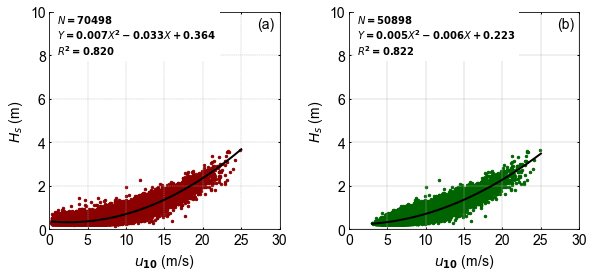

In [116]:
fig, ax_lst = plt.subplots(1, 2,figsize=(9.5, 4.), gridspec_kw={'hspace': 0.25, 'wspace': 0.3})
fig.tight_layout()

def label_subplots(ax_lst, *, upper_case=False,
                   offset_points=(-5, -5)):
    start_ord = 65 if upper_case else 97
    for ax, lab in zip(np.ravel(ax_lst), ('('+chr(j)+')' for j in count(start_ord))):
        ax.annotate(lab, (1., 1),
                    xytext=offset_points,
                    xycoords='axes fraction',
                    textcoords='offset points',
                    ha='right', va='top', fontsize=14, fontweight='regular')


label_subplots(ax_lst, upper_case=False)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

bins=range(0, 30, 1)


# Figure 1
ax_lst[0].scatter(x11, y11, s=6,color='darkred')

ax_lst[0].plot(xfit11, yfit11, color='black', linewidth=2)

ax_lst[0].set_xlabel('$u_{10}$ (m/s)', labelpad=5)
ax_lst[0].set_ylabel('$H_{s}$ (m)', labelpad=5)


ax_lst[0].set_ylim(0,10)
ax_lst[0].set_xlim(0,30)
ax_lst[0].set_xticks(np.arange(0,35,5))
ax_lst[0].grid(linestyle='--',linewidth=0.4)

props11 = dict(boxstyle='square', facecolor='white', alpha=1,edgecolor='white')

textstr11 = '\n'.join((r'$N=%i$' % (N11,), (r'$Y=%.3fX^{2} %.3fX + %.3f$' % (c11,b11,a11,)), (r'$R^2=%.3f$' % (r_squared1,))))

ax_lst[0].text(1.,8.,textstr11,fontsize=10,bbox=props11)


ax_lst[0].xaxis.set_tick_params(which='major', size=2, width=1, direction='in', top='on')
ax_lst[0].yaxis.set_tick_params(which='major', size=2, width=1, direction='in', right='on')


# Figure 2
ax_lst[1].scatter(x10, y10, s=6,color='darkgreen')

ax_lst[1].plot(xfit10, yfit10, color='black', linewidth=2)

ax_lst[1].set_xlabel('$u_{10}$ (m/s)', labelpad=5)
ax_lst[1].set_ylabel('$H_{s}$ (m)', labelpad=5)


ax_lst[1].set_ylim(0,10)
ax_lst[1].set_xlim(0,30)
ax_lst[1].set_xticks(np.arange(0,35,5))
ax_lst[1].grid(linestyle='-',linewidth=0.4)

props10 = dict(boxstyle='square', facecolor='white', alpha=1,edgecolor='white')

textstr10 = '\n'.join((r'$N=%i$' % (N10,), (r'$Y=%.3fX^{2} %.3fX + %.3f$' % (c10,b10,a10,)), (r'$R^2=%.3f$' % (r_squared,))))

ax_lst[1].text(1.,8.,textstr10,fontsize=10,bbox=props10)


ax_lst[1].xaxis.set_tick_params(which='major', size=2, width=1, direction='in', top='on')
ax_lst[1].yaxis.set_tick_params(which='major', size=2, width=1, direction='in', right='on')

plt.savefig('enve5320_buoy44020_wind_wave.png', dpi=600, bbox_inches='tight')